### **Lempel-Ziv-Welsh coding**

In [15]:
import heapq
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

def lzw_compress(input_string):
    dictionary = {"A": 1, "B": 2, "C": 3}
    next_code = 4
    s = ""
    compressed_data = []
    steps = []

    for c in input_string:
        if s + c in dictionary:
            s = s + c
        else:
            compressed_data.append(dictionary[s])
            dictionary[s + c] = next_code
            steps.append([s + c, next_code, compressed_data[-1]])
            next_code += 1
            s = c

    if s:
        compressed_data.append(dictionary[s])

    return compressed_data, steps


def generate_table(steps):
    df = pd.DataFrame(steps, columns=["New Entry", "Code Assigned", "Output Code"])
    print("\nLZW Compression Steps Table:")
    print(df.to_string(index=False))

# Example usage
input_string = "ABABBABCABABBA"
compressed_output, steps = lzw_compress(input_string)
print("Compressed Output:", compressed_output)

generate_table(steps)


Compressed Output: [1, 2, 4, 5, 2, 3, 4, 6, 1]

LZW Compression Steps Table:
New Entry  Code Assigned  Output Code
       AB              4            1
       BA              5            2
      ABB              6            4
      BAB              7            5
       BC              8            2
       CA              9            3
      ABA             10            4
     ABBA             11            6


In [18]:
def lzw_decompress(compressed_data):
    dictionary = {1: "A", 2: "B", 3: "C"}
    next_code = 4
    s = ""
    decompressed_data = []
    steps = []

    for k in compressed_data:
        if k in dictionary:
            entry = dictionary[k]
        elif k == next_code:
            entry = s + s[0]
        else:
            raise ValueError("Invalid compressed data")

        decompressed_data.append(entry)

        if s:
            dictionary[next_code] = s + entry[0]
            steps.append([next_code, dictionary[next_code]])
            next_code += 1

        s = entry

    return "".join(decompressed_data), steps


def generate_table(steps, columns):
    df = pd.DataFrame(steps, columns=columns)
    print("\nLZW Steps Table:")
    print(df.to_string(index=False))

# Example usage
input_string = "ABABBABCABABBA"

decompressed_output, decompression_steps = lzw_decompress(compressed_output)
print("Decompressed Output:", decompressed_output)

generate_table(decompression_steps, ["Code Assigned", "New Entry"])


Decompressed Output: ABABBABCABABBA

LZW Steps Table:
 Code Assigned New Entry
             4        AB
             5        BA
             6       ABB
             7       BAB
             8        BC
             9        CA
            10       ABA
            11      ABBA


## Static Huffman Coding

Huffman Codes: {'A': '0', 'B': '10', 'C': '110', 'D': '111'}
Encoded Output: 0 0 0 0 10 10 110 111
Decoded Output: AAAABBCD

Huffman Encoding Table:
Character  Frequency Huffman Code
        A          4            0
        B          2           10
        C          1          110
        D          1          111


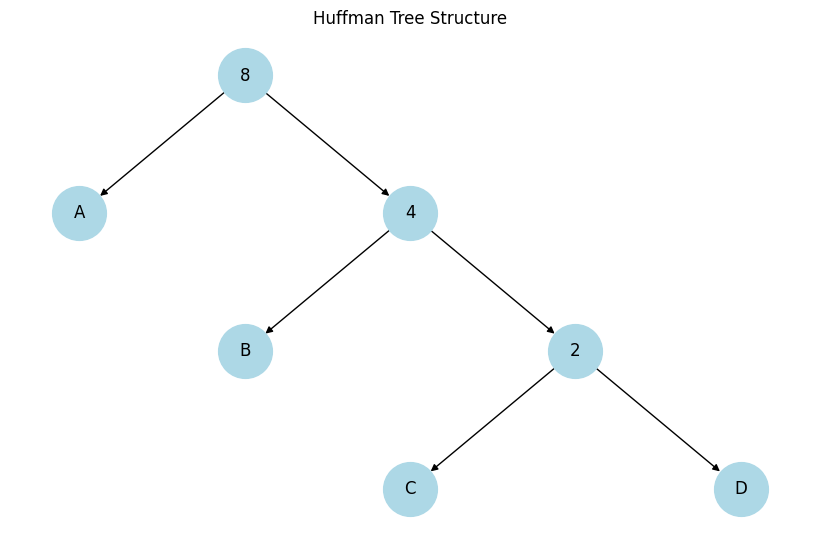

In [17]:
import heapq
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from collections import defaultdict

class HuffmanNode:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(text):
    frequency = defaultdict(int)
    for char in text:
        frequency[char] += 1

    heap = [HuffmanNode(char, freq) for char, freq in frequency.items()]
    heapq.heapify(heap)

    steps = []  # Store merging steps for visualization
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
        steps.append((left.char, right.char, left.freq, right.freq, merged.freq))

    return heap[0], frequency, steps

def generate_huffman_codes(node, prefix="", codebook={}):
    if node:
        if node.char is not None:
            codebook[node.char] = prefix
        generate_huffman_codes(node.left, prefix + "0", codebook)
        generate_huffman_codes(node.right, prefix + "1", codebook)
    return codebook

def huffman_encode(text, codebook):
    return " ".join(codebook[char] for char in text)

def huffman_decode(encoded_text, root):
    decoded_text = ""
    node = root
    for bit in encoded_text.replace(" ", ""):
        if bit == "0":
            node = node.left
        else:
            node = node.right
        if node.char is not None:
            decoded_text += node.char
            node = root
    return decoded_text

def generate_table(frequencies, codes):
    df = pd.DataFrame(list(frequencies.items()), columns=["Character", "Frequency"])
    df["Huffman Code"] = df["Character"].map(codes)
    print("\nHuffman Encoding Table:")
    print(df.to_string(index=False))

def visualize_huffman_tree(root):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def traverse(node, parent=None, depth=0, x=0):
        if node:
            node_id = id(node)
            pos[node_id] = (x, -depth)
            labels[node_id] = node.char if node.char else node.freq
            if parent is not None:
                G.add_edge(parent, node_id)
            traverse(node.left, node_id, depth + 1, x - 1)
            traverse(node.right, node_id, depth + 1, x + 1)

    traverse(root)
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1500, node_color='lightblue')
    plt.title("Huffman Tree Structure")
    plt.show()

# Example usage
input_text = "AAAABBCD"
huffman_tree, frequencies, steps = build_huffman_tree(input_text)
huffman_codes = generate_huffman_codes(huffman_tree)
encoded_text = huffman_encode(input_text, huffman_codes)

decoded_text = huffman_decode(encoded_text, huffman_tree)

print("Huffman Codes:", huffman_codes)
print("Encoded Output:", encoded_text)
print("Decoded Output:", decoded_text)

generate_table(frequencies, huffman_codes)
visualize_huffman_tree(huffman_tree)


# **Dynamic/Adaptive Huffman encoding**

Huffman Codes: {'D': '0', 'C': '10', 'A': '11'}
Encoded Output: 11 11 0 10 10 0 0

Huffman Encoding Table:
Character  Frequency Huffman Code
        A          2           11
        D          3            0
        C          2           10


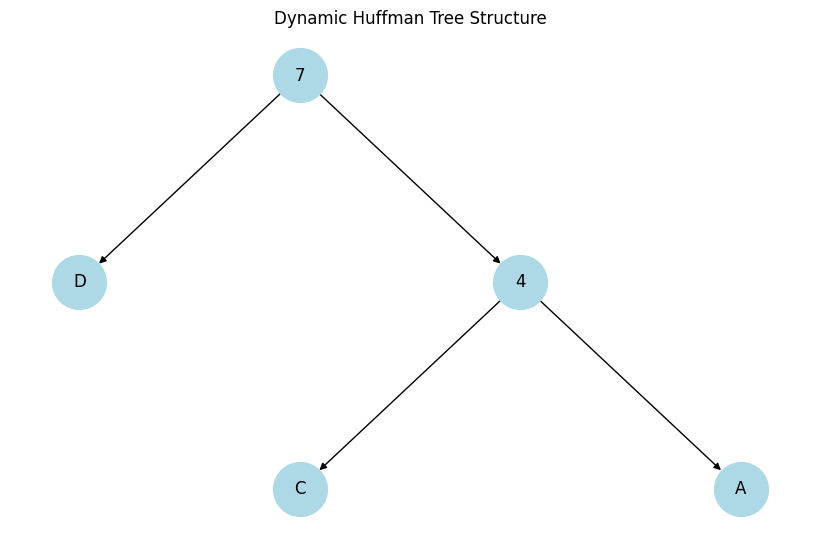

Decoded Output: AADCCDD


In [22]:
import heapq
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from collections import defaultdict, Counter

class HuffmanNode:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

class DynamicHuffman:
    def __init__(self):
        self.root = None
        self.frequency = Counter()
        self.codebook = {}
        self.steps = []

    def update_tree(self, text):
        self.frequency.update(text)
        heap = [HuffmanNode(char, freq) for char, freq in self.frequency.items()]
        heapq.heapify(heap)

        while len(heap) > 1:
            left = heapq.heappop(heap)
            right = heapq.heappop(heap)
            merged = HuffmanNode(None, left.freq + right.freq)
            merged.left = left
            merged.right = right
            heapq.heappush(heap, merged)
            self.steps.append((left.char, right.char, left.freq, right.freq, merged.freq))

        self.root = heap[0]
        self.codebook = self.generate_huffman_codes(self.root)

    def generate_huffman_codes(self, node, prefix="", codebook={}):
        if node:
            if node.char is not None:
                codebook[node.char] = prefix
            self.generate_huffman_codes(node.left, prefix + "0", codebook)
            self.generate_huffman_codes(node.right, prefix + "1", codebook)
        return codebook

    def encode(self, text):
        self.update_tree(text)
        return " ".join(self.codebook[char] for char in text)

    def decode(self, encoded_text):
        decoded_text = ""
        current_node = self.root
        for bit in encoded_text.replace(" ", ""):
            if bit == "0":
                current_node = current_node.left
            else:
                current_node = current_node.right

            if current_node.char is not None:
                decoded_text += current_node.char
                current_node = self.root
        return decoded_text

def generate_table(frequencies, codes):
    df = pd.DataFrame(list(frequencies.items()), columns=["Character", "Frequency"])
    df["Huffman Code"] = df["Character"].map(codes)
    print("\nHuffman Encoding Table:")
    print(df.to_string(index=False))

def visualize_huffman_tree(root):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def traverse(node, parent=None, depth=0, x=0):
        if node:
            node_id = id(node)
            pos[node_id] = (x, -depth)
            labels[node_id] = node.char if node.char else node.freq
            if parent is not None:
                G.add_edge(parent, node_id)
            traverse(node.left, node_id, depth + 1, x - 1)
            traverse(node.right, node_id, depth + 1, x + 1)

    traverse(root)
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1500, node_color='lightblue')
    plt.title("Dynamic Huffman Tree Structure")
    plt.show()

# Dynamic Huffman Encoding & Decoding
input_text = "AADCCDD"
dh = DynamicHuffman()
encoded_text = dh.encode(input_text)
print("Huffman Codes:", dh.codebook)
print("Encoded Output:", encoded_text)
generate_table(dh.frequency, dh.codebook)
visualize_huffman_tree(dh.root)

decoded_text = dh.decode(encoded_text)
print("Decoded Output:", decoded_text)


Encoded Value: 1.043

Arithmetic Encoding Table:
Character      Range
        e (0.0, 0.3)
        n (0.3, 0.6)
        t (0.6, 0.8)
        w (0.8, 0.9)
        . (0.9, 1.0)
Decoded Output: 


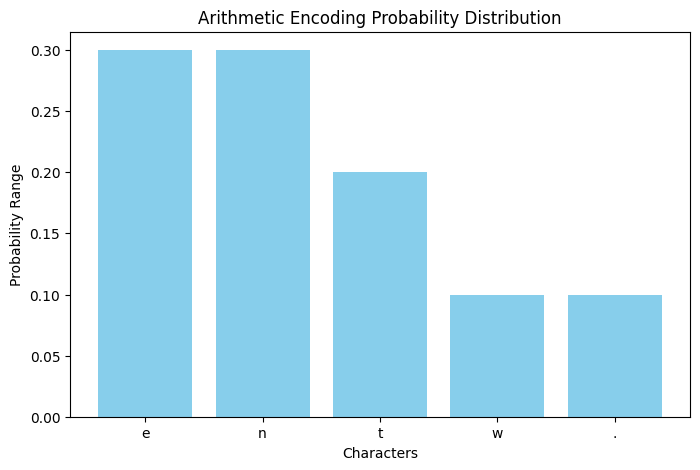

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Given probabilities
given_probabilities = {
    'e': (0.0, 0.3),
    'n': (0.3, 0.6),
    't': (0.6, 0.8),
    'w': (0.8, 0.9),
    '.': (0.9, 1.0)
}

# Arithmetic Encoding
def arithmetic_encode(text, probabilities):
    low, high = 0.0, 1.0
    range_ = 1.0
    for char in text:
        low = low + range_ * probabilities[char][0]
        high = low + range_ * probabilities[char][1]
        range_ = high - low
    return (low + high) / 2

# Arithmetic Decoding
def arithmetic_decode(encoded_value, probabilities, length):
    decoded_text = ""
    low, high = 0.0, 1.0
    range_ = 1.0
    for _ in range(length):
        for char, (char_low, char_high) in probabilities.items():
            if low <= encoded_value < high:
                decoded_text += char
                range_ = high - low
                high = low + range_ * char_high
                low = low + range_ * char_low
                break
    return decoded_text

# Generate Probability Table
def generate_table(probabilities):
    df = pd.DataFrame(probabilities.items(), columns=["Character", "Range"])
    print("\nArithmetic Encoding Table:")
    print(df.to_string(index=False))

# Example usage
input_text = "went"
encoded_value = arithmetic_encode(input_text, given_probabilities)
print("Encoded Value:", encoded_value)
generate_table(given_probabilities)
decoded_text = arithmetic_decode(encoded_value, given_probabilities, len(input_text))
print("Decoded Output:", decoded_text)

# Plot probability distribution
def plot_probabilities(probabilities):
    chars = list(probabilities.keys())
    ranges = [high - low for low, high in probabilities.values()]
    plt.figure(figsize=(8, 5))
    plt.bar(chars, ranges, color='skyblue')
    plt.xlabel("Characters")
    plt.ylabel("Probability Range")
    plt.title("Arithmetic Encoding Probability Distribution")
    plt.show()

plot_probabilities(given_probabilities)
